# Neuron wrapper example notebook

This notebook is made to give an overview on how to use the NEURON wrapper that is a wrapper package designed to help the usage of NEURON. It is important to note that this package writes codes in _.hoc_ language and creates codefiles that would be run later. 

What difficult is to understand the different parameters of a run. Neuron (wrapper) is capable of generating rotating fields around a neuron model. 

## Neuron models

There are 25 (5 cells of 5 different types of) neurons. See picture below. Indices are from 1-25 in natural order (left -> right, top -> down).

<img src="cells_morphology.jpg"
     alt="Aberra cells morphology"
     style="float: center; margin-right: 10px;" />

## Importing and Setting up Environment

Natural OS display environment should be set to off (deleted), because otherwise the GUI might pop up and slow down calculations.

In [1]:
#import sys, os
#sys.path.append('/home/kfuruglyas/Documents/neunos_project/codes/')
try:
    del os.environ['DISPLAY']
except:
    pass

Importing the necessary packages and default parameters from __params.txt__ file -- which is a Python code file actually. Immediately after that, a copy is made to avoid modifying the original params. 

In [2]:
import neuron_wrapper as nw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
exec(open('params.txt').read())
params_ = params.copy()

In [4]:
print(*list(params.keys()), sep = '\n')

stim_amps
theta_0
thetas
phi_0
phis
DEL
DUR
AMP
cell_id
stim_mode
tstop
dt
fname_to_save_data
fname_to_save_params
compartment
nevezektan
save_all_params
part
fname_to_save_rec
project_path
run_dir
project_name
v_inits


#### Parameters
- **_stim_amps_ [a.u.]: List of float/int which are multipliers to _AMP_ parameter. Length of list must be set to the number of different angles/rotational sections.**
- _theta_0_ [degrees]: Float, denoting the theta angle (in spherical coordinates) of the resting angle. It is present during the zeroth section (during _DEL_ from start).
- **_thetas_ [degrees]: List of floats, each with the theta angle (in sp. c.) for every rotational section. Please set this to have the same length as _stim_amps_.**
- _phi_0_ [degrees]: Float, denoting the phi angle (in spherical coordinates) of the resting angle. It is present during the zeroth section (during _DEL_ from start).
- **_phis_ [degrees]: List of floats, each with the phi angle (in sp. c.) for every rotational section. Please set this to have the same length as _stim_amps_.**
- _DEL_ [millisecond]: Length of resting state/zeroth section (no stimulation at the beginning).
- **_DUR_ [millisecond]: Length of one stimulation section.**
- **_AMP_ [milliVolt]: Overall amplitude of stimulation. _stim_amps_ will be multiplied by this number for each section to have the final real amplitude.**
- **_cell_id_: Int 1-25, the index of the cell, see Aberra et al. 2018.**
- _stim_mode_: Int, leave this as 2.
- _tstop_ [millisecond]: When to stop stimulation. This should be _DEL_ + n*_DUR_
- _dt_ [millisecond]: Timestep, 0.025 ms = 25 us by default.
- **_fname_to_save_data_: Str, where to save data.**
- _fname_to_save_params_: Str, where to save params.
- _compartment_: Str, 'soma', 'dend', 'apic', 'axon'. Unsure about this tbh...
- _nevezektan_: Dict, leave it as it is in the example. What properties to save. Becareful as some cells have different than others and can cause error.
- _save_all_params_: Bool, True, it doesn't make the run slower that much.
- _part_: Float 0..1, where to measure on that compartment.
- _fname_to_save_rec: Str, where to save recordings, irrelevant.
- _project_path_: Str, irrelevant.
- _run_dir_: Str, irrelevant.
- _project_name_: Str, irrelevant.
- _v_inits_: Dict of floats, for each cell on where to start initial soma voltage.


In [5]:
params_['thetas'] = [90] # in degrees
params_['phis'] = [90] # in degrees NOTE: thetas, phis and stim_amps shall have the same leghts!
params_['AMP'] = 100 # in milliVolts
params_['stim_amps'] = [1] # multiplier factor(s) to AMP
params_['DUR'] = 20 # duration of one stimulus section
params_['tstop'] = 22 # when to stop stimulation
params_['cell_id'] = 16 #1-25
params_['nevezektan'] = nevezektan_dict if params_['cell_id'] not in mas_sejtek else nevezektan_dict_mas # not the same mechanisms
params_["fname_to_save_data"] = f"example.dat"
nw.run(params_)


NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

## Load in results

Pandas is the most helpful thing.

In [38]:
def load_nw_result(fname = "example.dat"):
    df = pd.read_csv(fname, sep=" ", index_col = None)
    df_modified = df[df.columns[:-1]]
    df_modified.columns = df.columns[1:]
    df = df_modified
    return df

In [39]:
df = load_nw_result()

In [40]:
df.head(20)

,soma.cai,soma.cao,soma.cm,soma.decay_CaDynamics_E2,soma.depth_CaDynamics_E2,soma.diam,soma.dica_dv_,soma.dik_dv_,soma.dina_dv_,soma.e_extracellular,...,apic.m_NaTs2_t,apic.m_SKv3_1,apic.nai,apic.nao,apic.order_xtra,apic.type_xtra,apic.v,apic.x_xtra,apic.y_xtra,apic.z_xtra
0.000,0.00005,2,1,873.499,0.1,13.6118,5.721610e-09,0.000006,2.949170e-09,0.0,...,0.001496,0.000076,10,140,1,7,-73.3240,-0.934228,12.8317,-2.90374
0.025,0.00005,2,1,873.499,0.1,13.6118,5.721610e-09,0.000006,2.949170e-09,0.0,...,0.001495,0.000076,10,140,1,7,-73.3278,-0.934228,12.8317,-2.90374
0.050,0.00005,2,1,873.499,0.1,13.6118,5.721580e-09,0.000006,2.946590e-09,0.0,...,0.001495,0.000076,10,140,1,7,-73.3313,-0.934228,12.8317,-2.90374
0.075,0.00005,2,1,873.499,0.1,13.6118,5.721530e-09,0.000006,2.942900e-09,0.0,...,0.001494,0.000076,10,140,1,7,-73.3345,-0.934228,12.8317,-2.90374
0.100,0.00005,2,1,873.499,0.1,13.6118,5.721460e-09,0.000006,2.938770e-09,0.0,...,0.001494,0.000076,10,140,1,7,-73.3375,-0.934228,12.8317,-2.90374
0.125,0.00005,2,1,873.499,0.1,13.6118,5.721370e-09,0.000006,2.934520e-09,0.0,...,0.001493,0.000076,10,140,1,7,-73.3403,-0.934228,12.8317,-2.90374
0.150,0.00005,2,1,873.499,0.1,13.6118,5.721270e-09,0.000006,2.930280e-09,0.0,...,0.001492,0.000076,10,140,1,7,-73.3430,-0.934228,12.8317,-2.90374
0.175,0.00005,2,1,873.499,0.1,13.6118,5.721140e-09,0.000006,2.926110e-09,0.0,...,0.001491,0.000076,10,140,1,7,-73.3457,-0.934228,12.8317,-2.90374
0.200,0.00005,2,1,873.499,0.1,13.6118,5.721010e-09,0.000006,2.922030e-09,0.0,...,0.001491,0.000076,10,140,1,7,-73.3483,-0.934228,12.8317,-2.90374
0.225,0.00005,2,1,873.499,0.1,13.6118,5.720860e-09,0.000006,2.918040e-09,0.0,...,0.001490,0.000076,10,140,1,7,-73.3508,-0.934228,12.8317,-2.90374


Okay I only need the time and voltages:

In [8]:
df[['soma.v', 'dend.v', 'apic.v', 'axon.v']]

,soma.v,dend.v,apic.v,axon.v
0.000,-73.0000,-73.0000,-73.0000,-73.0000
0.025,-73.0038,-73.0010,-73.0036,-73.0085
0.050,-73.0067,-73.0026,-73.0064,-73.0133
0.075,-73.0091,-73.0043,-73.0089,-73.0168
0.100,-73.0113,-73.0060,-73.0110,-73.0197
...,...,...,...,...
21.900,-72.7144,-72.5356,-72.7009,-73.0562
21.925,-72.7183,-72.5401,-72.7048,-73.0591
21.950,-72.7222,-72.5447,-72.7088,-73.0621
21.975,-72.7261,-72.5493,-72.7127,-73.0649


These are the properties that were saved:

In [71]:
print(*list(df.columns), sep = '\n')

soma.cai
soma.cao
soma.cm
soma.decay_CaDynamics_E2
soma.depth_CaDynamics_E2
soma.diam
soma.dica_dv_
soma.dik_dv_
soma.dina_dv_
soma.e_extracellular
soma.e_pas
soma.eca
soma.ek
soma.ena
soma.es_xtra
soma.ex_xtra
soma.gCa_Ca
soma.gCa_LVAst_Ca_LVAst
soma.gCa_LVAstbar_Ca_LVAst
soma.gCabar_Ca
soma.gIm_Im
soma.gImbar_Im
soma.gK_Pst_K_Pst
soma.gK_Pstbar_K_Pst
soma.gK_Tst_K_Tst
soma.gK_Tstbar_K_Tst
soma.gNaTs2_t_NaTs2_t
soma.gNaTs2_tbar_NaTs2_t
soma.gNap_Et2_Nap_Et2
soma.gNap_Et2bar_Nap_Et2
soma.gSK_E2_SK_E2
soma.gSK_E2bar_SK_E2
soma.gSKv3_1_SKv3_1
soma.gSKv3_1bar_SKv3_1
soma.g_pas
soma.gamma_CaDynamics_E2
soma.h_Ca
soma.h_Ca_LVAst
soma.h_K_Pst
soma.h_K_Tst
soma.h_NaTs2_t
soma.h_Nap_Et2
soma.i_cap
soma.i_membrane
soma.i_pas
soma.ica
soma.ica_Ca
soma.ica_Ca_LVAst
soma.ik
soma.ik_Im
soma.ik_K_Pst
soma.ik_K_Tst
soma.ik_SK_E2
soma.ik_SKv3_1
soma.ina
soma.ina_NaTs2_t
soma.ina_Nap_Et2
soma.ki
soma.ko
soma.m_Ca
soma.m_Ca_LVAst
soma.m_Im
soma.m_K_Pst
soma.m_K_Tst
soma.m_NaTs2_t
soma.m_Nap_Et2
soma.m_S

## Run from Targeted field

In order to plot the field, we will need a 3-sided plot from tikhonov

In [10]:
import scipy.io
import sys
sys.path = ['/media/veracrypt1/Neunos/tikhonov/'] + sys.path

import tikhonov as tik

We will need the field in (r, theta, phi) instead of (x, y, z).

In [11]:
def descartes_to_spherical(x, y, z, degrees = True):
    r = np.sqrt(x*x + y*y + z*z)
    phi = np.arctan2(y,x)
    theta = np.arccos(z/r)
    return (r, np.rad2deg(theta), np.rad2deg(phi)) if degrees else (r, theta, phi)

Load (targeted) field.

In [29]:
field = scipy.io.loadmat("data/A1.mat")['ef_vectmean']

In [30]:
field.shape

(192, 256, 256, 3)

### Norming field

As fields come in every shape, one shall norm it. In the following, we will normalize the field, so that the maximum field will be 1. 

In [31]:
np.nanmax(field)

0.29462682134772133

In [32]:
field = field/np.nanmax(field)

In [33]:
np.nanmax(field)

1.0

Get all (valid) targets. It may take up to a couple of seconds.

In [34]:
all_targets = []
for c, v in np.ndenumerate(field[:, :, :, 0]):
    if not np.isnan(v):
        all_targets.append(c)

Importing visualization

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

__Running for a given coordinate__

In [64]:
def run_for_coordinate(field, coordinate, cell_id  = 16, save_as = None, 
                         AMP = 100, DUR = 20, ax = None, plot_3side = True):
    r, theta, phi = descartes_to_spherical(*field[coordinate])
    if plot_3side:
        tik.field_manipulation.plot_3side(data = field, target = coordinate)
    params_ = params.copy()
    params_['thetas'] = [theta] # in degrees
    params_['phis'] = [phi] # in degrees NOTE: thetas, phis and stim_amps shall have the same leghts!
    params_['AMP'] = AMP # in milliampers
    params_['stim_amps'] = [r] # multiplier factor(s) to AMP
    params_['DUR'] = DUR # duration of one stimulus section
    params_['tstop'] = params_['DEL'] + len(params_['thetas'])*params_['DUR'] # when to stop stimulation
    params_['cell_id'] = cell_id #1-25
    params_['nevezektan'] = nevezektan_dict if params_['cell_id'] not in mas_sejtek else nevezektan_dict_mas # not the same mechanisms
    params_["fname_to_save_data"] = save_as if save_as is not None else "example.dat"
    print(f"Final amplitude: {AMP*r} mV.")
    nw.run(params_)
    if ax is not None:
        df = pd.read_csv(params_["fname_to_save_data"], sep=" ", index_col = None)
        df_modified = df[df.columns[:-1]]
        df_modified.columns = df.columns[1:]
        df = df_modified
        ax.plot(df.index, df["soma.v"])
        ax.set_xlabel('Time [ms]')
        ax.set_ylabel('Soma voltage [mV]')
        ax.set_title(f'Stimulation of cell no. {cell_id} with {AMP*r:.2f} mV.')

Example run of the function:

Input field is 3D vector field, created magnitude scalar field.
Final amplitude: 69.19672586511109 mV.


NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_3
numSect was 502
Created List of SectionRefs for 502 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 428 Axonal sections w/ 779 Myelin, 779 Node, 146 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1778
Created List of SectionRefs for 1778 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2376 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 30 ms, amp = 120 uA 

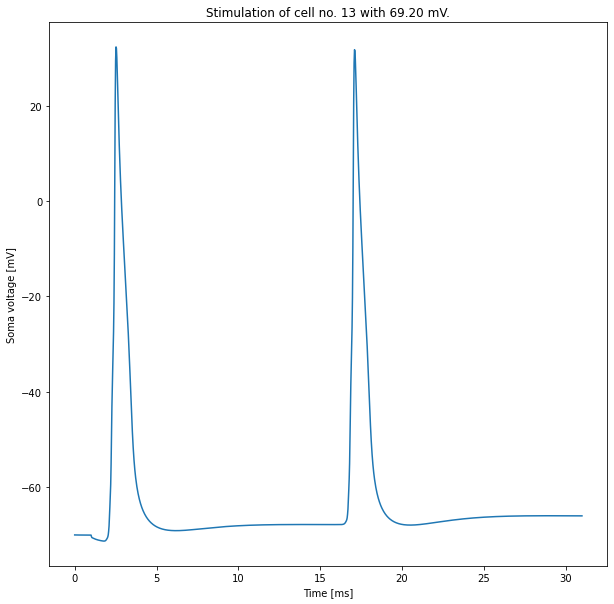

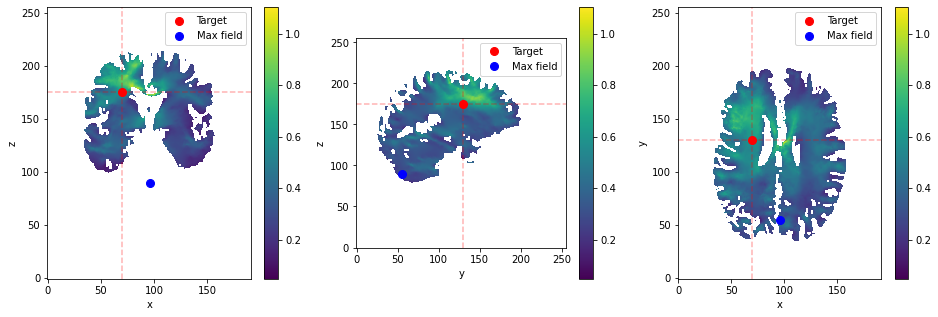

In [65]:
target = (70, 130, 175)

fig, ax = plt.subplots(1,1, figsize=(10,10), facecolor = 'w')

run_for_coordinate(field, coordinate = target, cell_id = 13, save_as = 'example_1run.dat',
                    AMP = 120, DUR = 30, ax = ax)

Visualization of the different compartments:


In [66]:
df = load_nw_result("example_1run.dat")

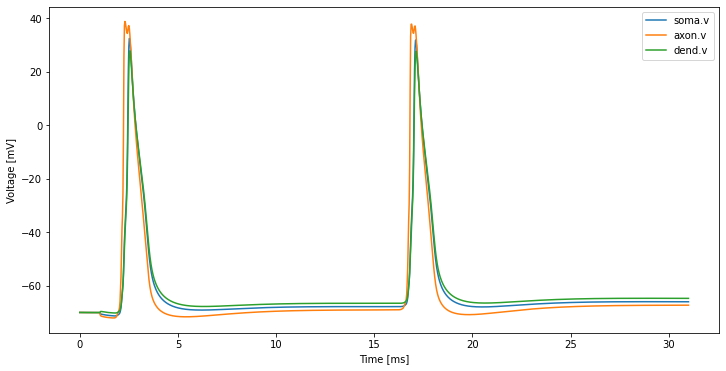

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12,6), facecolor = 'w')
for name in ['soma.v', 'axon.v', 'apic.v', 'dend.v']:
    try:
        ax.plot(df.index, df[name], label = name)
    except KeyError:
        continue
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Voltage [mV]')
ax.legend()

### Multiple Runs

Below I make a run for 5 random targets/cells, with 5 different types of neurons; [1, 6, 11, 16, 21], the first column of the first figure. 

Input field is 3D vector field, created magnitude scalar field.
Final amplitude: 34.04500412212835 mV.


NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_1
numSect was 293
Created List of SectionRefs for 293 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 234 Axonal sections w/ 103 Myelin, 103 Node, 184 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 449
Created List of SectionRefs for 449 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 665 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA or

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L23_PC_cADpyr229_1
numSect was 211
Created List of SectionRefs for 211 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 120 Axonal sections w/ 366 Myelin, 366 Node, 24 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1419 compartments
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_1
numSect was 452
Created List of SectionRefs for 452 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 388 Axonal sections w/ 448 Myelin, 448 Node, 132 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1092
Created List of SectionRefs for 1092 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1676 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L6_TPC_L4_cADpyr231_1
numSect was 175
Created List of SectionRefs for 175 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 94 Axonal sections w/ 195 Myelin, 195 Node, 44 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1021 compartments
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_1
numSect was 293
Created List of SectionRefs for 293 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 234 Axonal sections w/ 103 Myelin, 103 Node, 184 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 449
Created List of SectionRefs for 449 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 665 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA or

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L23_PC_cADpyr229_1
numSect was 211
Created List of SectionRefs for 211 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 120 Axonal sections w/ 366 Myelin, 366 Node, 24 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1419 compartments
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_1
numSect was 452
Created List of SectionRefs for 452 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 388 Axonal sections w/ 448 Myelin, 448 Node, 132 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1092
Created List of SectionRefs for 1092 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1676 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L6_TPC_L4_cADpyr231_1
numSect was 175
Created List of SectionRefs for 175 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 94 Axonal sections w/ 195 Myelin, 195 Node, 44 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1021 compartments
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_1
numSect was 293
Created List of SectionRefs for 293 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 234 Axonal sections w/ 103 Myelin, 103 Node, 184 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 449
Created List of SectionRefs for 449 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 665 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA or

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L23_PC_cADpyr229_1
numSect was 211
Created List of SectionRefs for 211 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 120 Axonal sections w/ 366 Myelin, 366 Node, 24 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1419 compartments
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_1
numSect was 452
Created List of SectionRefs for 452 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 388 Axonal sections w/ 448 Myelin, 448 Node, 132 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1092
Created List of SectionRefs for 1092 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1676 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L6_TPC_L4_cADpyr231_1
numSect was 175
Created List of SectionRefs for 175 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 94 Axonal sections w/ 195 Myelin, 195 Node, 44 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1021 compartments
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_1
numSect was 293
Created List of SectionRefs for 293 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 234 Axonal sections w/ 103 Myelin, 103 Node, 184 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 449
Created List of SectionRefs for 449 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 665 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA or

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L23_PC_cADpyr229_1
numSect was 211
Created List of SectionRefs for 211 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 120 Axonal sections w/ 366 Myelin, 366 Node, 24 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1419 compartments
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_1
numSect was 452
Created List of SectionRefs for 452 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 388 Axonal sections w/ 448 Myelin, 448 Node, 132 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1092
Created List of SectionRefs for 1092 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1676 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

/media/veracrypt1/Neunos/tikhonov/tikhonov/field_manipulation.py:370: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(16,5))


Input field is 3D vector field, created magnitude scalar field.
Final amplitude: 26.04277619546315 mV.


NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L6_TPC_L4_cADpyr231_1
numSect was 175
Created List of SectionRefs for 175 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 94 Axonal sections w/ 195 Myelin, 195 Node, 44 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1021 compartments
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_1
numSect was 293
Created List of SectionRefs for 293 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 234 Axonal sections w/ 103 Myelin, 103 Node, 184 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 449
Created List of SectionRefs for 449 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 665 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA or

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L23_PC_cADpyr229_1
numSect was 211
Created List of SectionRefs for 211 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 120 Axonal sections w/ 366 Myelin, 366 Node, 24 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1419 compartments
numSect was 847
Created List of SectionRefs for 847 sections
Assigned section types to each section in

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L4_LBC_cACint209_1
numSect was 452
Created List of SectionRefs for 452 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 388 Axonal sections w/ 448 Myelin, 448 Node, 132 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1092
Created List of SectionRefs for 1092 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1676 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp = 100 uA 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 523 Myelin, 523 Node, 45 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 1305
Created List of SectionRefs for 1305 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2593 compartments
Got main axon (method 2)
Cell Loaded
Generated waveform with del = 1 ms, dur = 20 ms, amp 

NEURON -- VERSION 8.2.1 HEAD (c1590692) 2022-08-09
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 "mechanisms//CaDynamics_E2.mod" "mechanisms//Ca_HVA.mod" "mechanisms//Ca_LVAst.mod" "mechanisms//Ca.mod" "mechanisms//Ih.mod" "mechanisms//Im.mod" "mechanisms//K_Pst.mod" "mechanisms//K_Tst.mod" "mechanisms//Nap_Et2.mod" "mechanisms//NaTa_t.mod" "mechanisms//NaTs2_t.mod" "mechanisms//ProbAMPANMDA_EMS.mod" "mechanisms//ProbGABAAB_EMS.mod" "mechanisms//SK_E2.mod" "mechanisms//SKv3_1.mod" "mechanisms//xtra.mod"


	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	Vector[5] 
	Vector[5] 
	Vector[6] 
	Vector[6] 
	Vector[7] 
	Vector[7] 
	Vector[8] 
	Vector[8] 
	Vector[9] 
	Vector[9] 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L6_TPC_L4_cADpyr231_1
numSect was 175
Created List of SectionRefs for 175 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 1)
Myelinating axon: Replacing 94 Axonal sections w/ 195 Myelin, 195 Node, 44 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1021 compartments
numSect was 515
Created List of SectionRefs for 515 sections
Assigned section types to each 

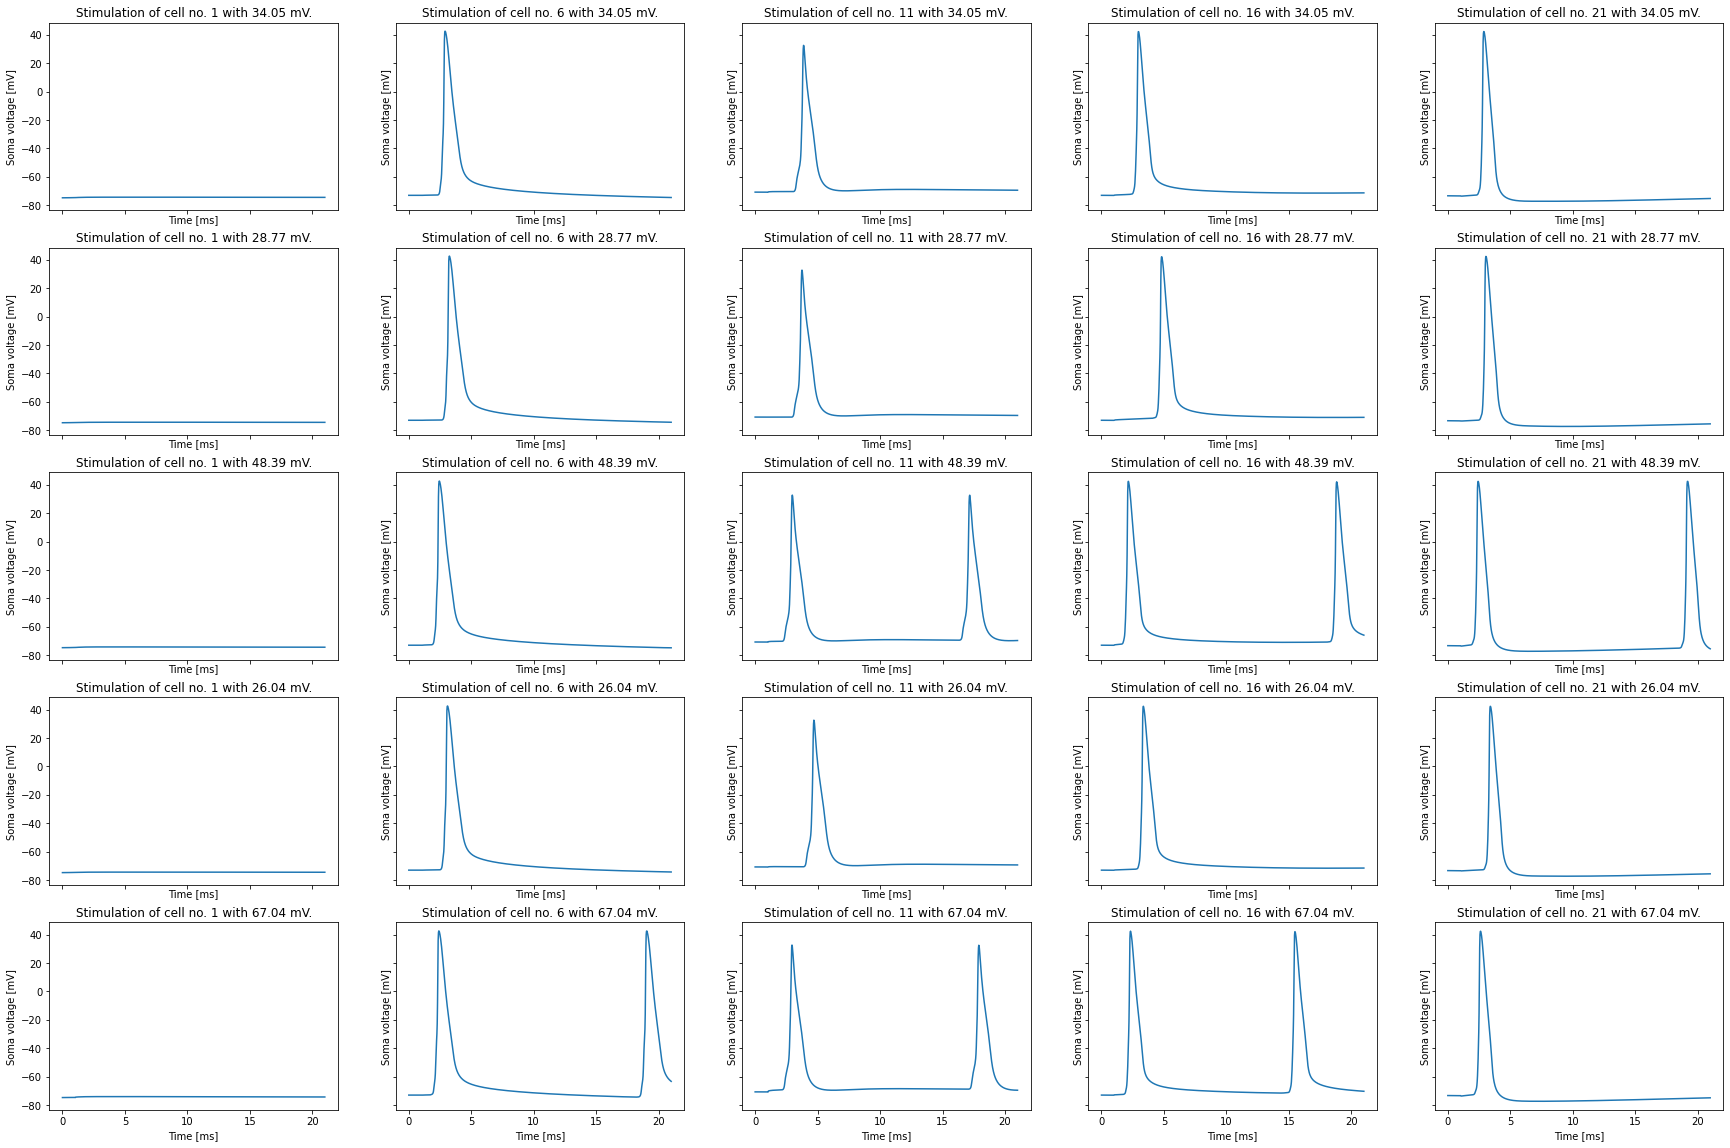

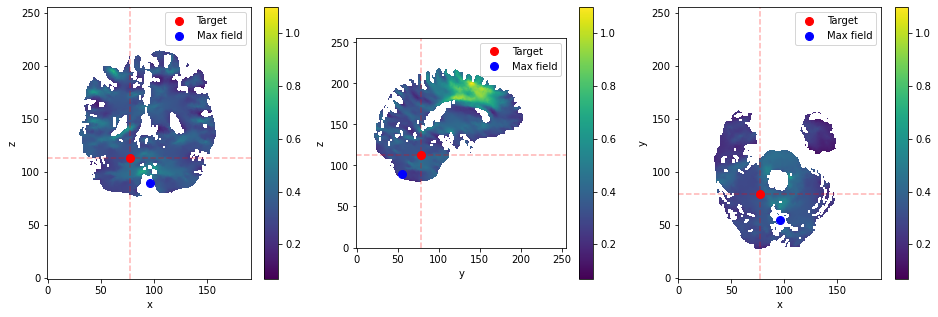

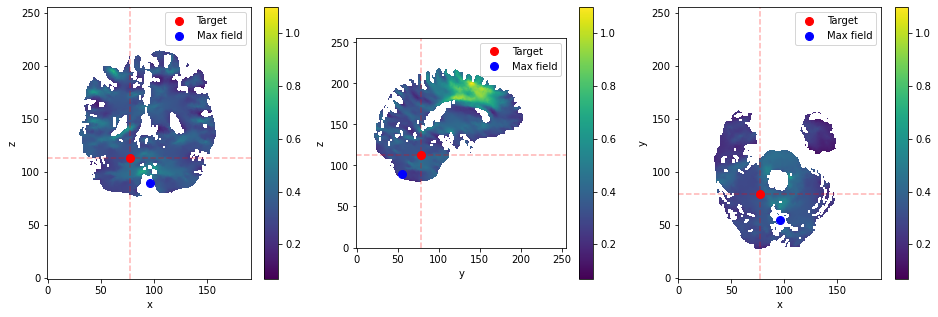

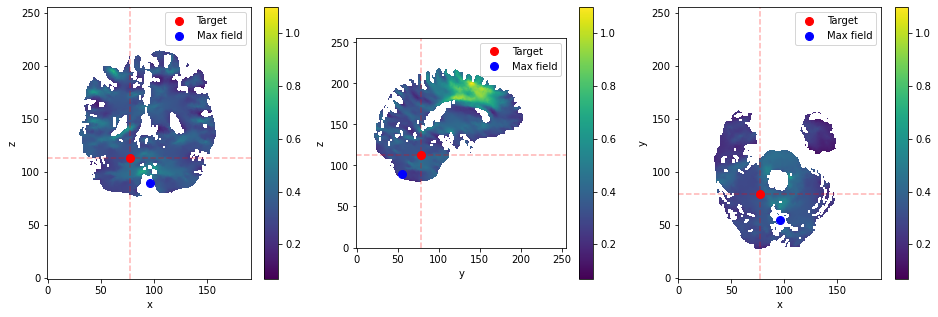

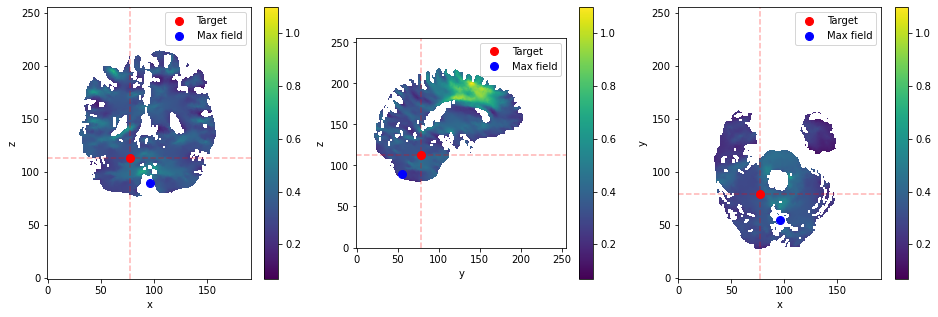

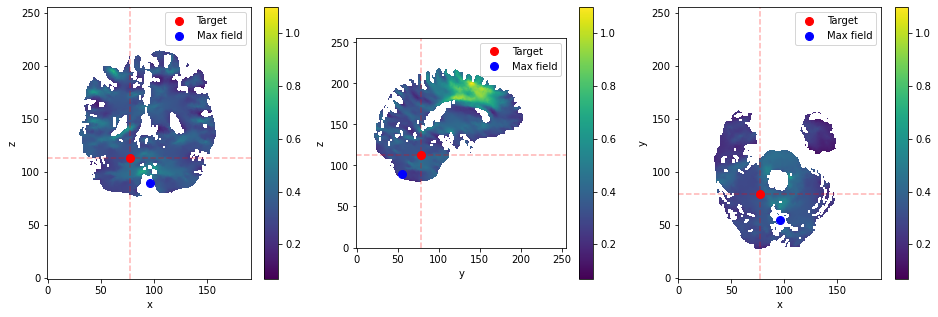

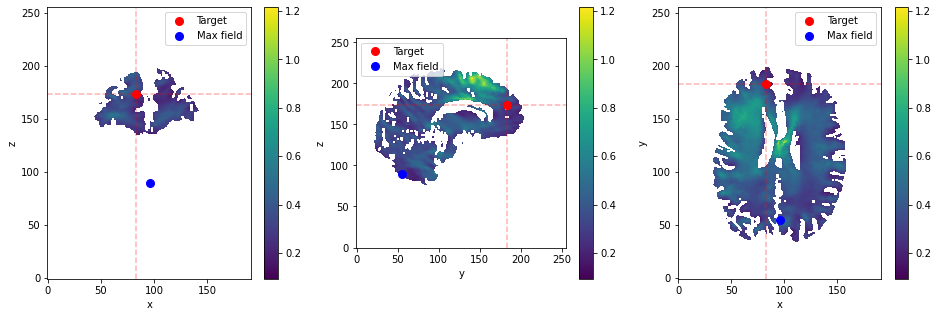

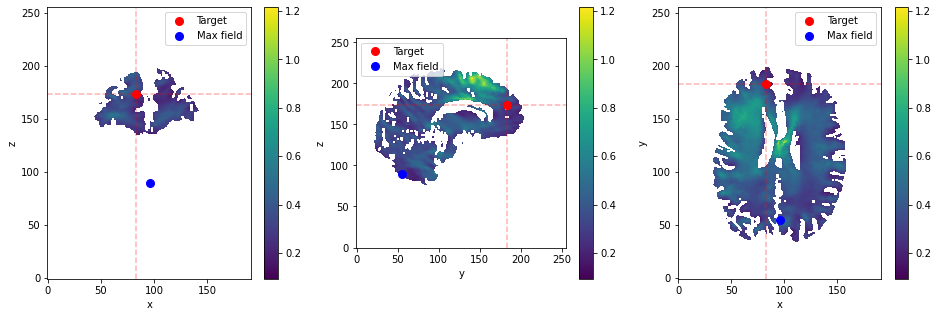

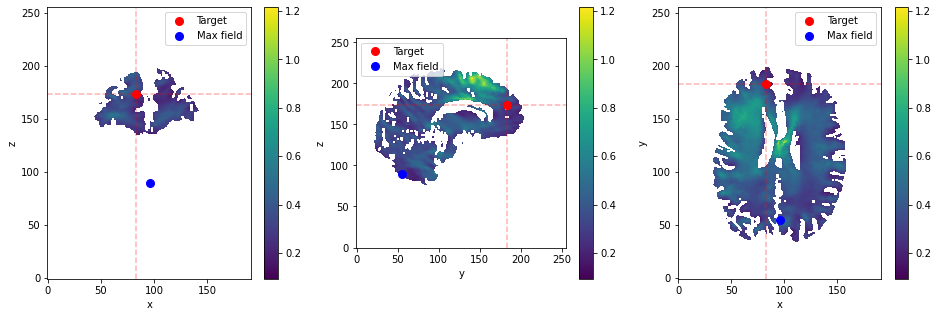

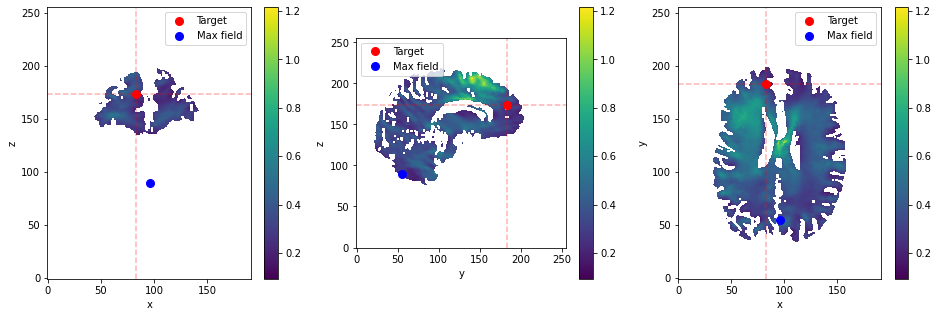

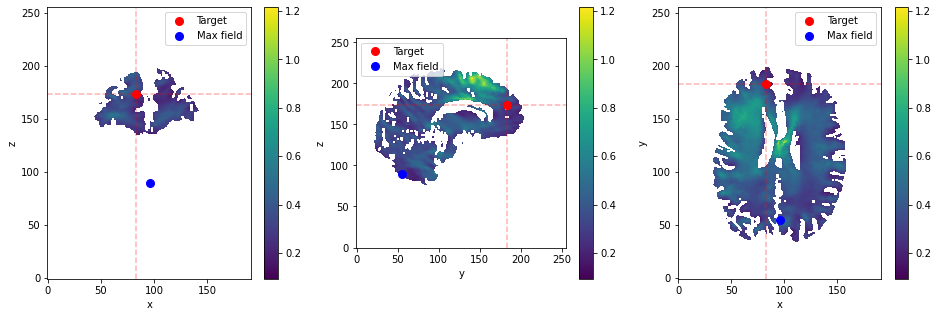

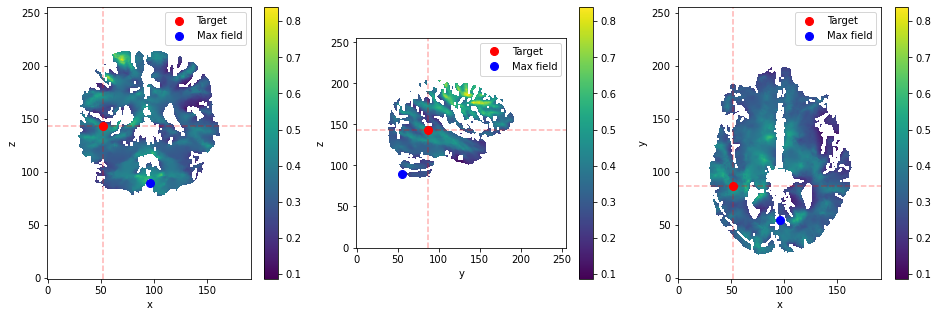

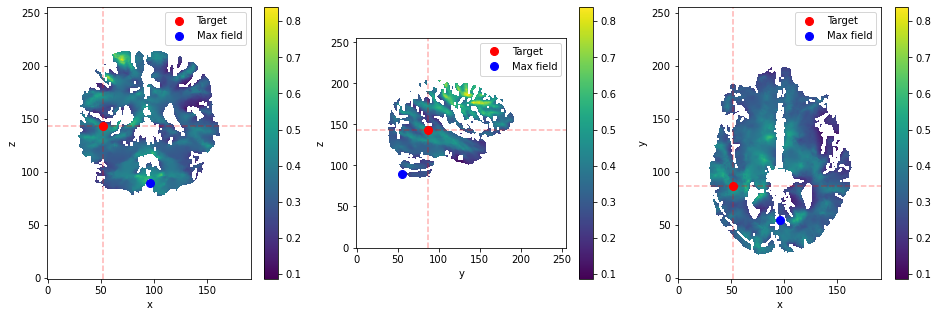

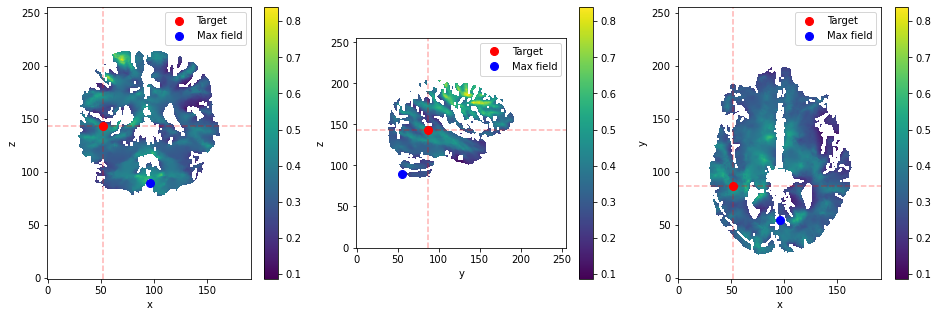

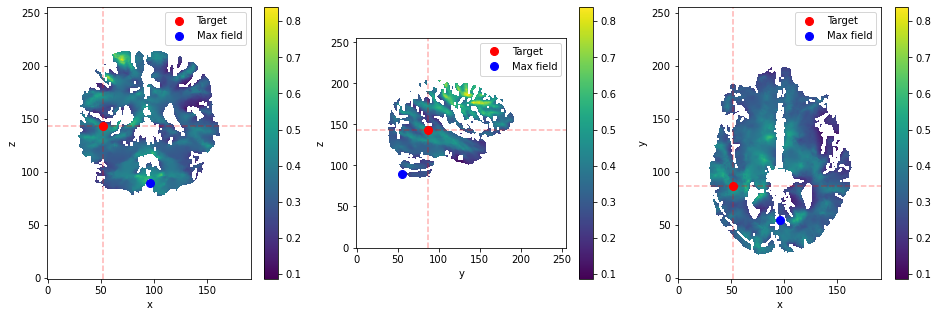

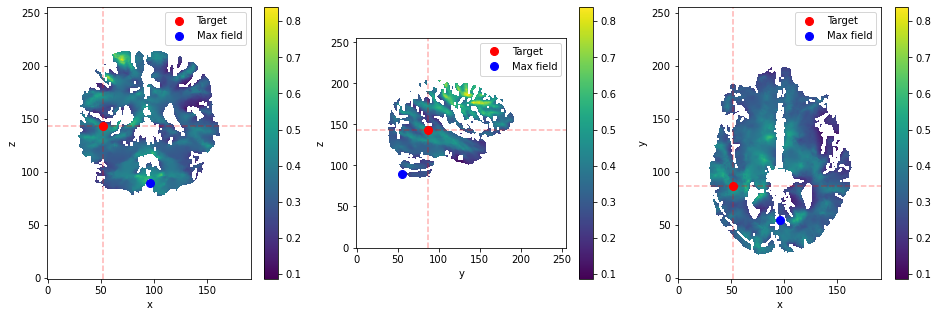

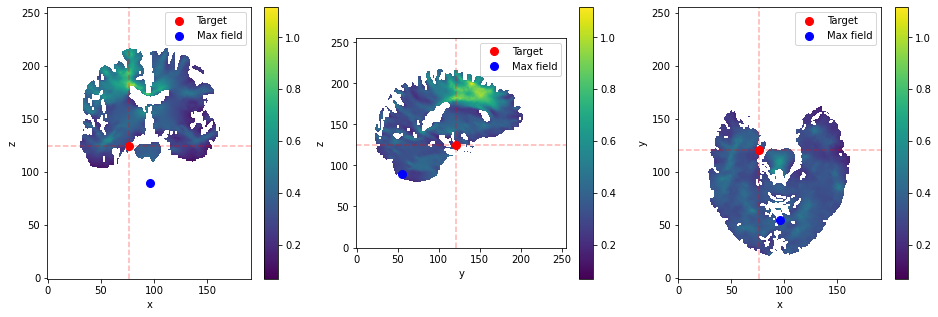

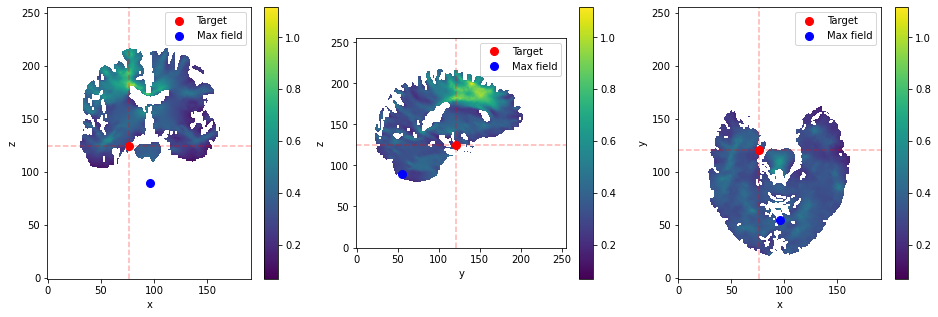

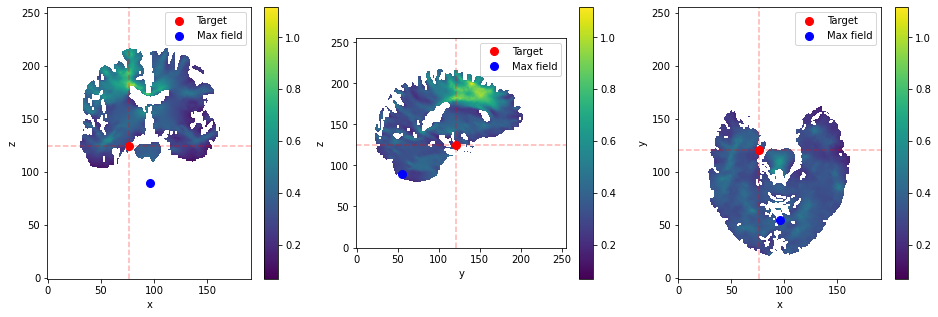

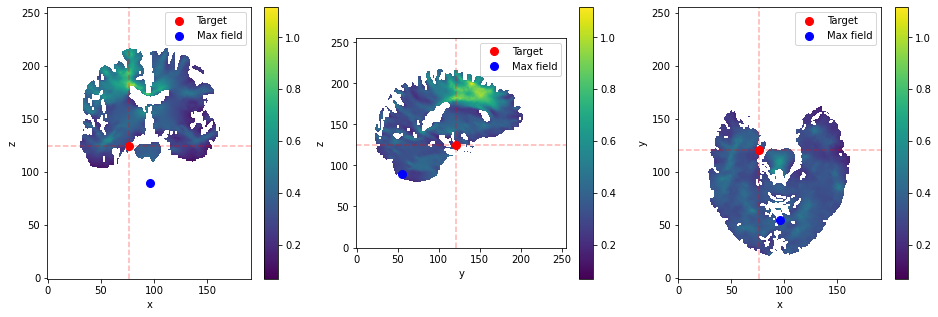

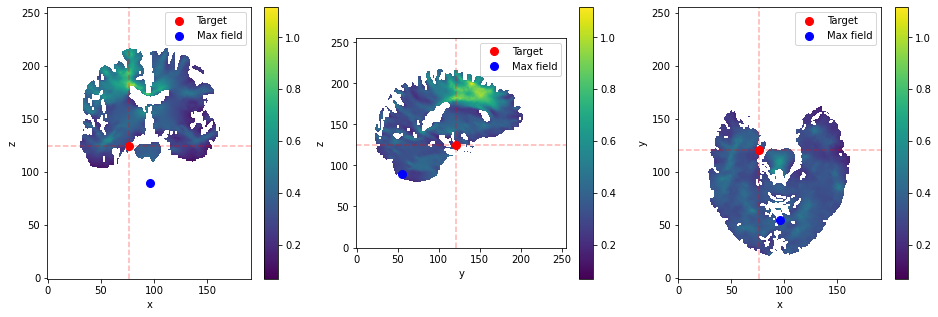

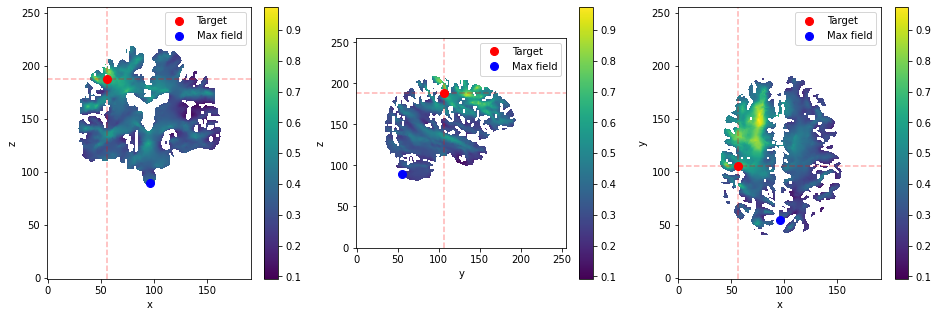

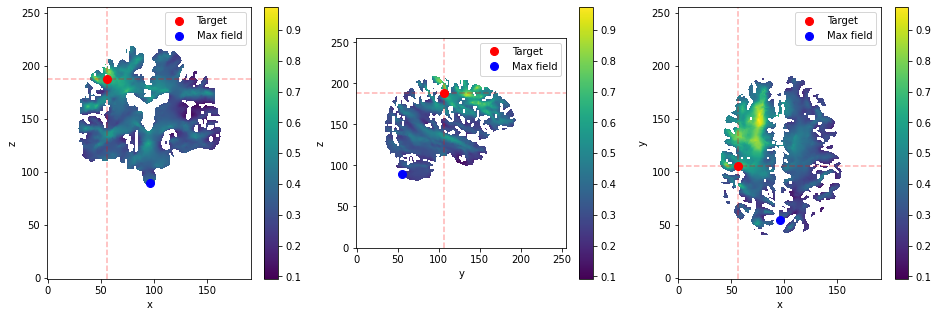

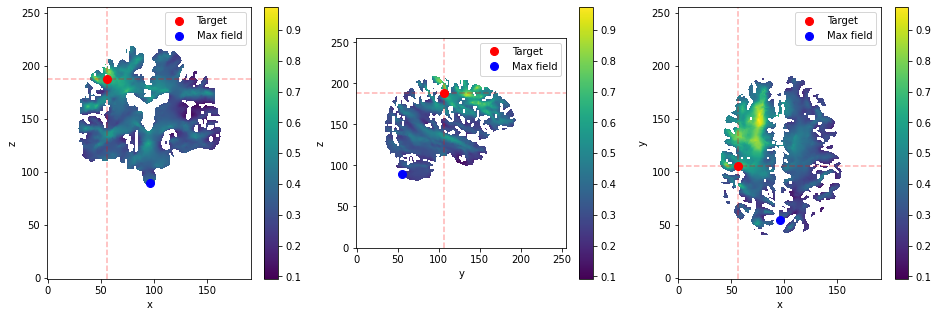

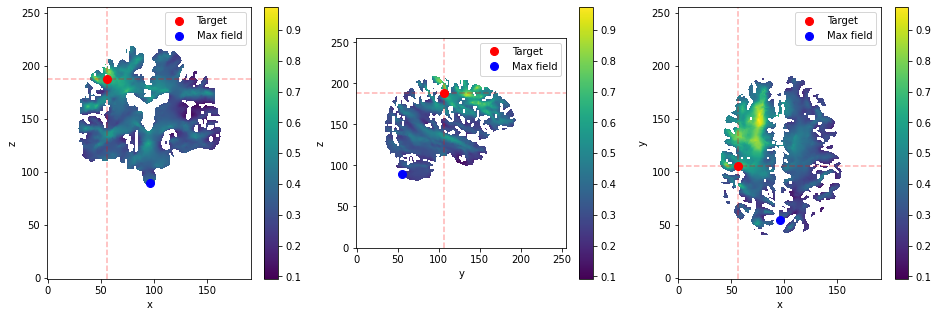

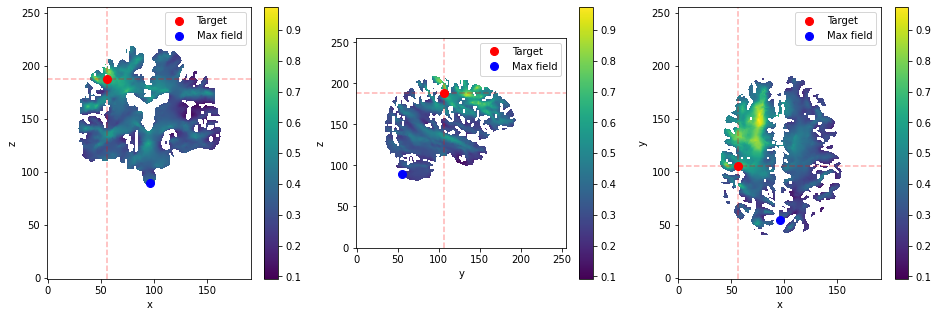

In [68]:
target_ids = np.random.choice(len(all_targets), 5)
targets = [all_targets[t] for t in target_ids]
num_of_targets = len(targets)
cells = [1, 6, 11, 16, 21]
num_of_cell_types = len(cells)

fig, axes = plt.subplots(num_of_targets, num_of_cell_types, figsize=(30, 20), 
                        sharex = True, sharey = True, facecolor = 'w')

for r, target_ind in enumerate(targets):
    for c, cell_id in enumerate(cells):
        ax = axes[r,c]
        run_for_coordinate(field, coordinate=target_ind,
                           cell_id = cell_id, ax = ax)